<a href="https://colab.research.google.com/github/Apurva-A/NN-from-scratch/blob/main/NN_no_libs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/train.csv')

In [18]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [19]:
Y_train

array([3, 6, 6, ..., 6, 2, 3])

In [20]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [21]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [22]:
Y_train = Y_train.astype(int)

In [23]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[4 9 0 ... 8 7 0] [3 6 6 ... 6 2 3]
0.07853658536585366
Iteration:  10
[4 0 0 ... 3 3 1] [3 6 6 ... 6 2 3]
0.15751219512195122
Iteration:  20
[3 0 9 ... 3 3 1] [3 6 6 ... 6 2 3]
0.19460975609756098
Iteration:  30
[3 9 9 ... 3 3 1] [3 6 6 ... 6 2 3]
0.22695121951219513
Iteration:  40
[3 9 9 ... 3 1 1] [3 6 6 ... 6 2 3]
0.25802439024390245
Iteration:  50
[3 9 9 ... 3 1 1] [3 6 6 ... 6 2 3]
0.2883170731707317
Iteration:  60
[3 4 9 ... 3 1 4] [3 6 6 ... 6 2 3]
0.32046341463414635
Iteration:  70
[3 4 9 ... 3 1 4] [3 6 6 ... 6 2 3]
0.3473414634146341
Iteration:  80
[3 4 9 ... 3 1 4] [3 6 6 ... 6 2 3]
0.36885365853658536
Iteration:  90
[3 4 9 ... 3 1 4] [3 6 6 ... 6 2 3]
0.39014634146341465
Iteration:  100
[3 4 9 ... 1 1 4] [3 6 6 ... 6 2 3]
0.4189024390243902
Iteration:  110
[3 4 9 ... 1 1 4] [3 6 6 ... 6 2 3]
0.4400731707317073
Iteration:  120
[3 4 9 ... 1 1 4] [3 6 6 ... 6 2 3]
0.46046341463414636
Iteration:  130
[3 7 9 ... 1 1 4] [3 6 6 ... 6 2 3]
0.47717073170731705
Iterati

In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


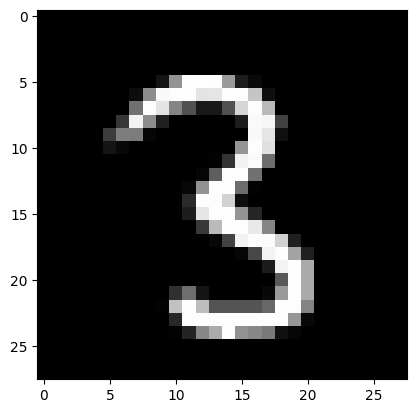

Prediction:  [6]
Label:  6


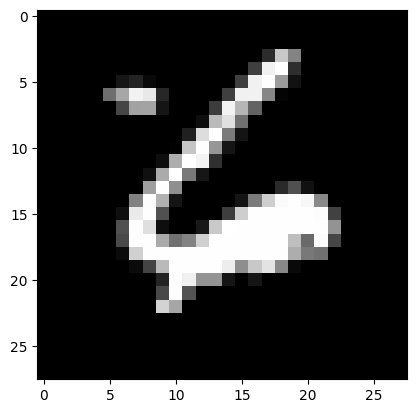

Prediction:  [6]
Label:  6


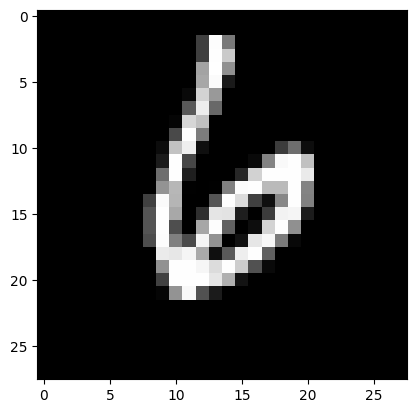

Prediction:  [2]
Label:  2


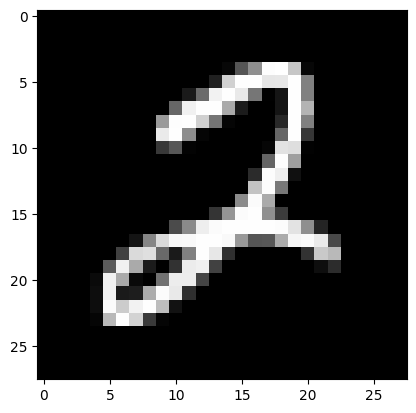

In [25]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [26]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 8 8 2 0 3 2 8 7 6 5 1 9 3 4 7 3 5 3 9 8 1 8 1 3 0 2 1 9 1 3 1 3 6 9 5 0
 6 2 9 8 8 7 9 4 9 0 8 8 8 1 9 1 1 5 2 2 0 7 5 2 8 6 9 2 0 2 8 0 0 0 5 1 9
 7 8 1 6 7 6 3 5 1 6 6 1 8 4 6 0 2 1 0 4 8 4 6 9 0 2 3 3 4 8 5 2 4 8 6 5 1
 2 1 4 8 2 2 2 6 2 7 1 5 1 3 1 4 6 0 7 8 2 4 5 4 3 5 0 2 9 8 9 7 9 4 0 1 1
 5 1 3 3 5 2 8 1 8 0 6 8 2 5 0 5 1 1 3 4 6 7 5 7 4 6 2 0 5 3 4 1 5 5 0 7 7
 0 2 0 3 0 6 8 0 6 5 0 7 7 5 4 5 2 8 5 6 4 9 0 3 7 1 4 2 9 9 9 4 3 7 5 8 6
 0 2 0 7 2 4 0 7 8 0 3 6 3 7 6 0 2 1 2 0 4 5 4 0 5 9 1 1 4 7 1 6 9 1 8 9 7
 2 2 3 9 9 6 1 7 1 5 4 3 3 2 4 7 8 0 0 2 9 7 9 6 4 0 8 2 5 5 6 2 8 4 2 1 8
 2 7 1 1 8 9 8 2 0 6 8 8 8 3 1 4 3 5 0 8 9 4 4 2 5 4 0 5 3 4 0 3 2 4 3 0 8
 9 3 1 5 2 9 5 6 1 0 1 1 2 5 5 2 4 5 1 9 5 7 7 1 1 6 1 3 1 4 9 4 3 4 6 9 8
 3 3 4 8 9 3 5 4 5 0 3 8 6 7 6 0 8 6 4 8 2 8 5 3 7 7 2 7 6 3 6 2 3 2 3 8 7
 9 6 3 0 7 2 8 2 6 3 3 3 3 6 7 9 3 1 3 5 9 1 5 7 2 0 7 2 2 6 8 6 2 6 2 2 3
 0 1 7 0 0 9 0 7 7 6 1 8 7 3 6 6 9 4 1 7 1 0 6 8 9 0 7 1 2 1 2 5 7 4 6 4 8
 7 9 0 5 2 1 7 7 7 8 1 8 

0.824